# Advanced Classification

Task: binary class classification 
* Class 0 -> LAYING STANDING SITTING WALKING  WALKING_DOWNSTAIRS
* Class 1 -> WALKING_UPSTAIRS

#### Importing libraries

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay, plot_precision_recall_curve

#### Load Train nooutlier ----> Transform in Train binary nooutlier & Load Test binary

In [3]:
#df_train = pd.read_csv('csv/train_nooutlier.csv')
#df_train['Class'] = 0
#df_train.loc[(df_train['Activity']==2), 'Class'] = 1
#df_train.drop(['Activity'], axis = 1)
#df_train.shape

In [4]:
#df_test = pd.read_csv('csv/test_binary.csv')
#df_test['Class'] = 0
#df_test.loc[(df_test['Activity']==2), 'Class'] = 1
#df_test.drop(['Activity'], axis = 1)
#df_test.shape

In [5]:
df_train = pd.read_csv('csv/train_binary.csv')
df_test = pd.read_csv('csv/test_binary.csv')

In [6]:
df_train['Class'] = 0
df_test['Class'] = 0

df_train.loc[(df_train['Activity']==2), 'Class'] = 1
df_test.loc[(df_test['Activity']==2), 'Class'] = 1

#### Data partitioning 

In [7]:
X_train = df_train.drop(['subject','Activity','ActivityName','Class'], axis = 1)
y_train = df_train.Class
test = df_test.drop(['subject','Activity','ActivityName'], axis = 1)
X_test = df_test.drop(['subject','Activity','ActivityName','Class'], axis = 1)
y_test = df_test.Class

In [8]:
y_train.value_counts()

0    6279
1    1073
Name: Class, dtype: int64

In [9]:
#X_train = df_train_binary.drop(['subject','Activity','ActivityName','Class'], axis = 1)
#y_train = df_train_binary.Class
#X_test = df_test_binary.drop(['subject','Activity','ActivityName','Class'], axis = 1)
#y_test = df_test_binary.Class

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7352, 561)
(7352,)
(2947, 561)
(2947,)


# LIME

In [37]:
from sklearn import metrics

In [38]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
random_forest_preds = random_forest.predict(X_test)
print('The accuracy of the Random Forests model is :\t',metrics.accuracy_score(random_forest_preds,y_test))

The accuracy of the Random Forests model is :	 0.9514760773668137


In [39]:
import lime
import lime.lime_tabular

In [40]:
predict_fn_rf = lambda x: random_forest.predict_proba(x).astype(float)
X = X_train.values
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = X_train.columns,class_names=['0','1'],kernel_width=5)

In [41]:
test.loc[[420]]

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
420           0.228273           0.007316          -0.067012   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
420         -0.284798         -0.464955         -0.536858         -0.315766   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
420         -0.478141          -0.51381         -0.053654  ...   

     fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
420                        -0.270337                        -0.664705   

     angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
420                     0.308068                               0.81196   

     angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
420                          0.902019                             -0.824521   

     angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  Class  
420             -0.839557              0.168028             -0.072323      0  

[1 rows x 562 columns]

In [42]:
choosen_instance = X_test.loc[[420]].values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=10)
exp.show_in_notebook(show_all=False)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [25]:
test.loc[[2940]]

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
2940           0.147146          -0.046908          -0.069338   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
2940         -0.348686          0.018057         -0.364716         -0.437199   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
2940          0.019297          -0.41124          0.053516  ...   

      fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
2940                        -0.552567                        -0.850109   

      angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
2940                     0.524082                               0.04197   

      angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
2940                         -0.922941                              0.489178   

      angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  Class  
2940             -0.660366              0.272243              0.178547      1  

[1 rows x 562 columns]

In [26]:
choosen_instance = X_test.loc[[2940]].values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=10)
exp.show_in_notebook(show_all=False)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


# SHAP

In [65]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
random_forest_preds = random_forest.predict(X_test)
print('The accuracy of the Random Forests model is :\t',metrics.accuracy_score(random_forest_preds,y_test))

The accuracy of the Random Forests model is :	 0.9558873430607397


In [66]:
import shap 

In [67]:
explainer = shap.TreeExplainer(random_forest)

In [68]:
shap_values_2 = shap.TreeExplainer(random_forest).shap_values(X_train)

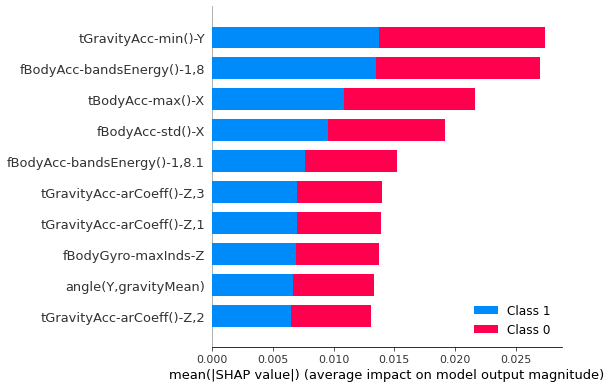

In [71]:
shap.summary_plot(shap_values_2, X_train, plot_type="bar", max_display=10)

In [72]:
test.loc[[420]]

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
420           0.228273           0.007316          -0.067012   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
420         -0.284798         -0.464955         -0.536858         -0.315766   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
420         -0.478141          -0.51381         -0.053654  ...   

     fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
420                        -0.270337                        -0.664705   

     angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
420                     0.308068                               0.81196   

     angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
420                          0.902019                             -0.824521   

     angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  Class  
420             -0.839557              0.168028             -0.072323      0  

[1 rows x 562 columns]

In [73]:
choosen_instance = X_test.loc[[420]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

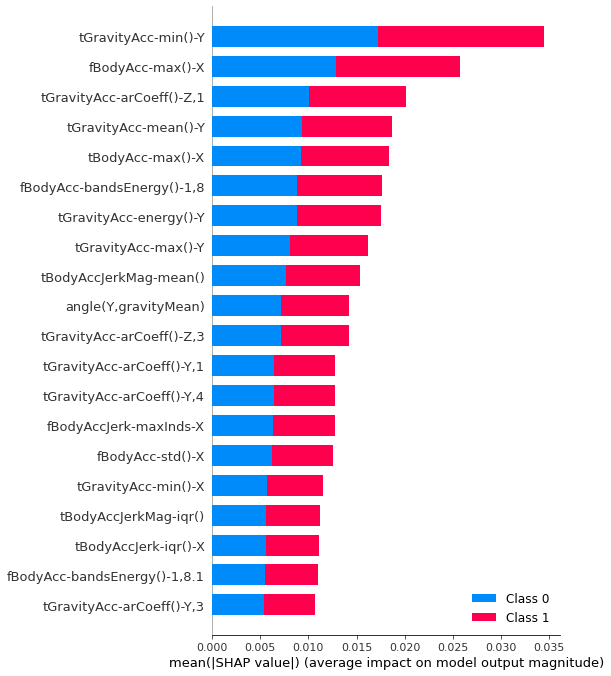

In [74]:
shap.summary_plot(shap_values, X_train)

In [82]:
X_train.mean().loc['fBodyAcc-max()-X']

-0.6473101901531068

In [84]:
X_train.mean().loc['tGravityAcc-min()-Y']

0.023248028465098807

In [79]:
y_test.mean()

0.15982354937224297

In [42]:
test.loc[[100]]

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
100           0.240421           0.001085          -0.118881   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
100         -0.433321         -0.097815         -0.397341         -0.475121   

     tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
100          -0.14434          -0.37872         -0.182617  ...   

     fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
100                        -0.104555                        -0.469177   

     angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
100                     0.617096                              0.134464   

     angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
100                          -0.80297                              0.479051   

     angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  Class  
100             -0.670877              0.325196              0.005666      0  

[1 rows x 562 columns]

In [43]:
choosen_instance = X_test.loc[[100]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

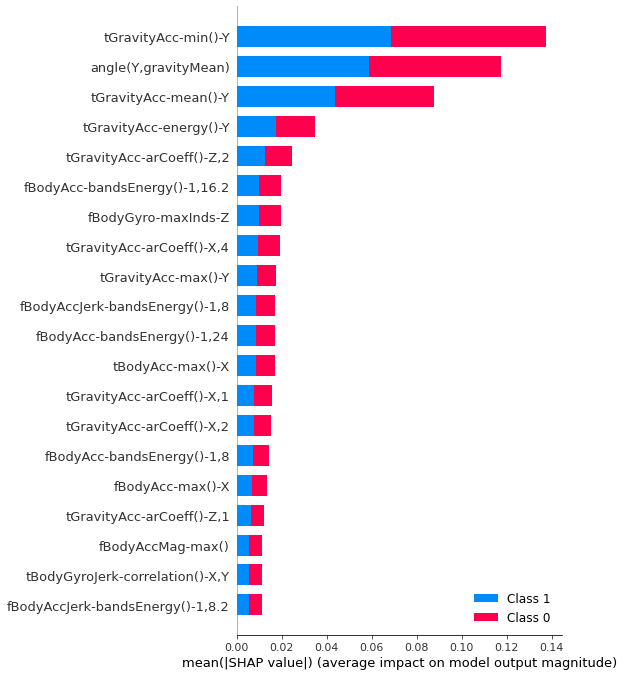

In [44]:
shap.summary_plot(shap_values, X_train)

In [16]:
test.loc[[2940]]

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
2940           0.147146          -0.046908          -0.069338   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
2940         -0.348686          0.018057         -0.364716         -0.437199   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
2940          0.019297          -0.41124          0.053516  ...   

      fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
2940                        -0.552567                        -0.850109   

      angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
2940                     0.524082                               0.04197   

      angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
2940                         -0.922941                              0.489178   

      angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  Class  
2940             -0.660366              0.272243              0.178547      1  

[1 rows x 562 columns]

In [17]:
choosen_instance = X_test.loc[[2940]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

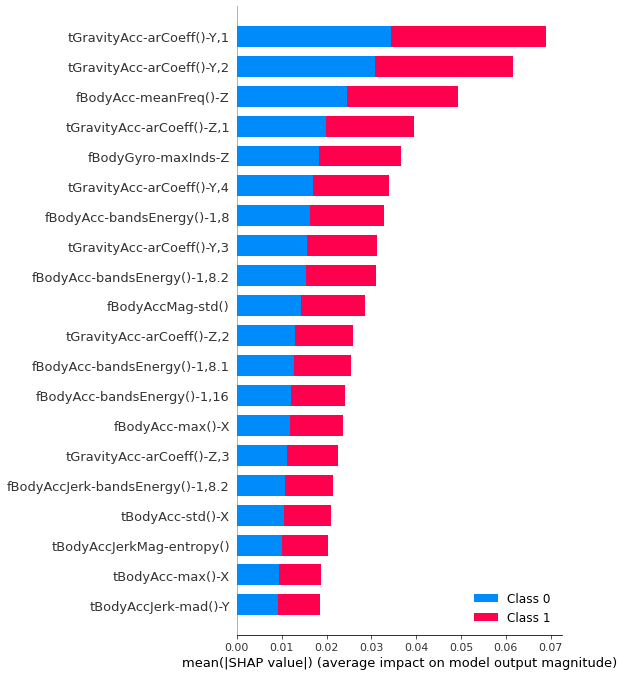

In [18]:
shap.summary_plot(shap_values, X_train)